# <font color = 'orange'> Lab | Cleaning categorical data </font>

- Instructions
- Import the necessary libraries if you are starting a new notebook.
- Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
- What should we do with the customer_id column?
- Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
numerical_df = customer_df.select_dtypes()
categorical_df = customer_df.select_dtypes()
- Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
- For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [294]:
# Import the necessary libraries if you are starting a new notebook.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import datetime


In [295]:
# Load the csv. Use the variable customer_df as customer_df = pd.read_csv().
customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [296]:
# What should we do with the customer_id column?
# Eliminarla no nos sirve para el analisis, ya que es un identificador unico de cada cliente
customer_df=customer_df.drop(['Customer'],axis=1)


In [297]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [298]:
# Vamos a poner los nombres de las columnas en minusculas y con _
def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x

clean_headers(customer_df)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [299]:
numerical = customer_df.select_dtypes("number")
categorical = customer_df.select_dtypes("object")


In [300]:
# Plot every categorical variable
# This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis
categorical


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


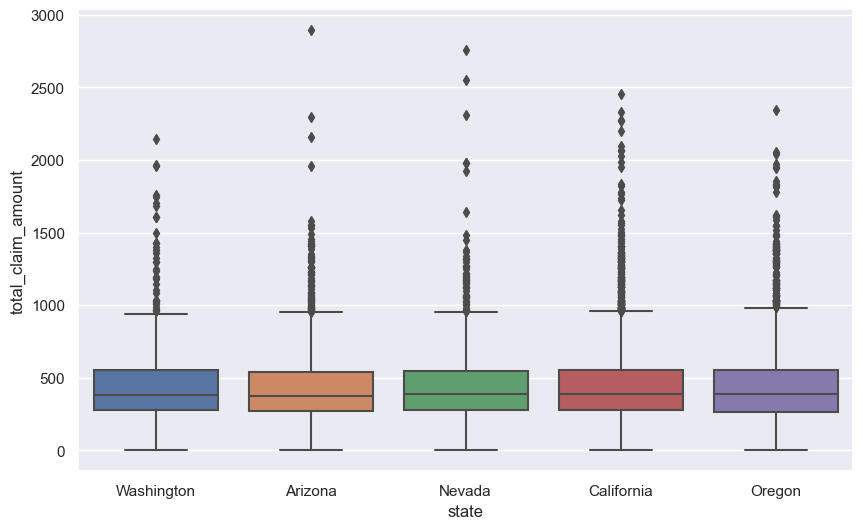

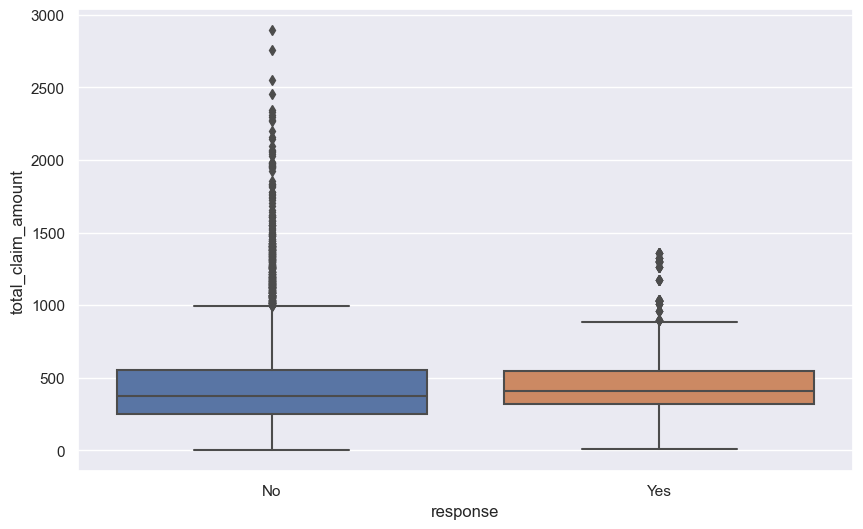

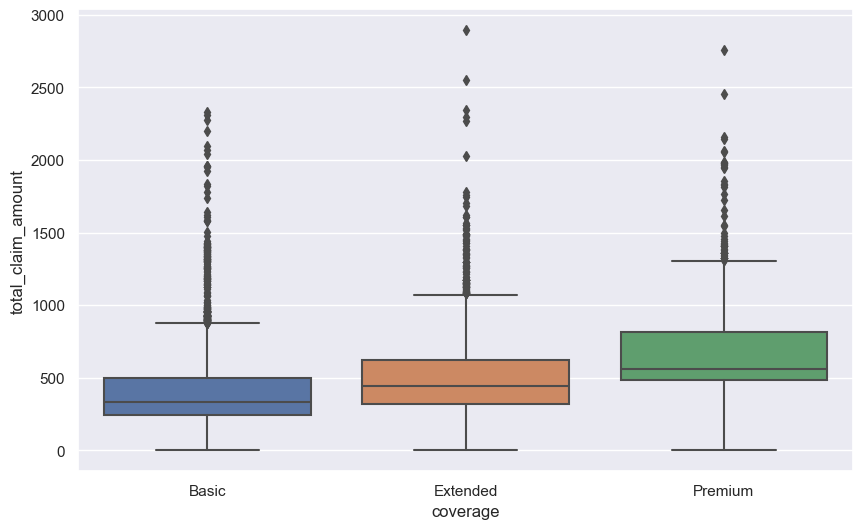

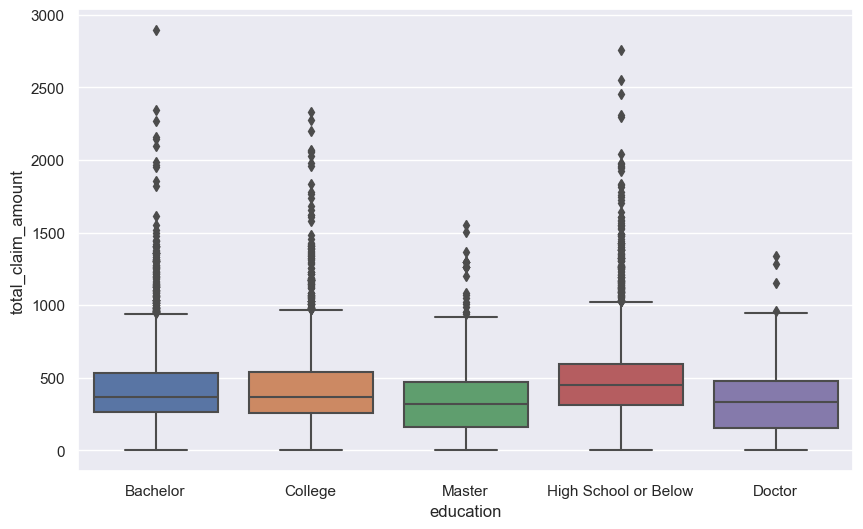

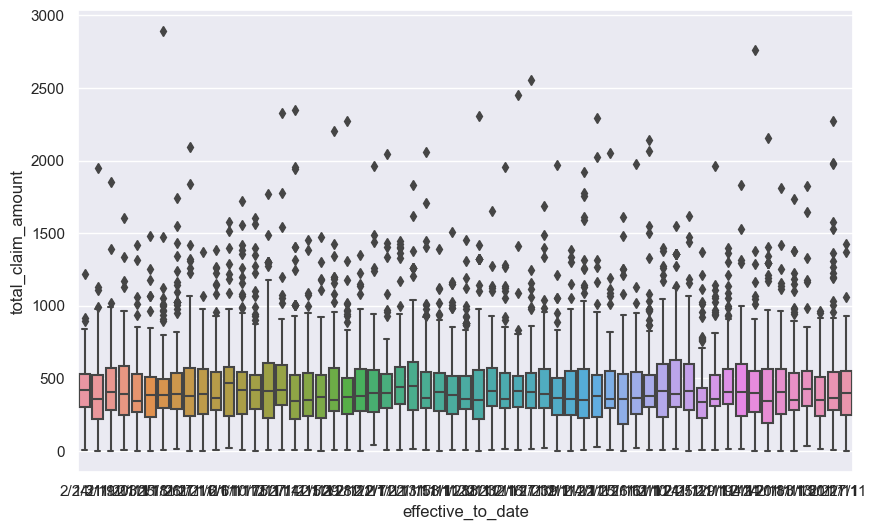

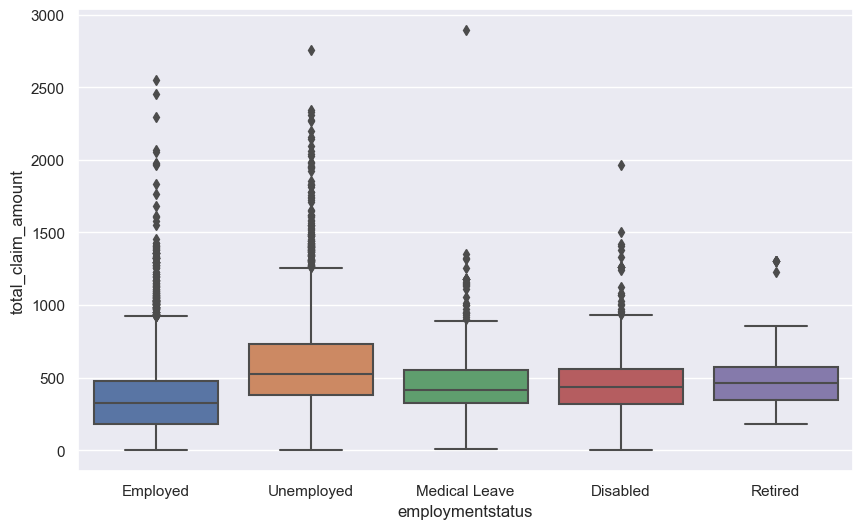

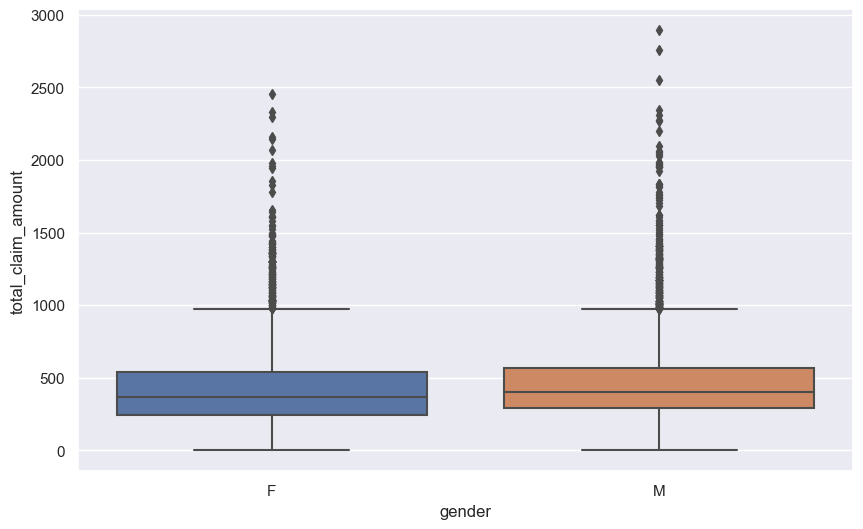

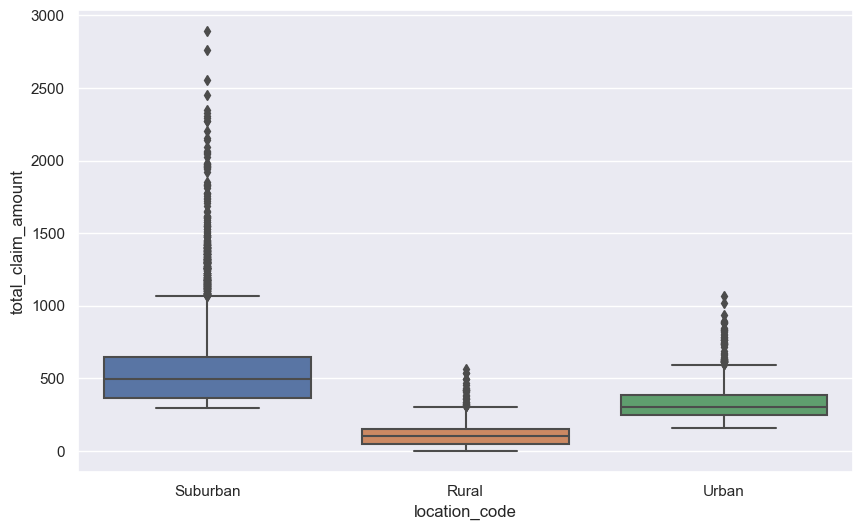

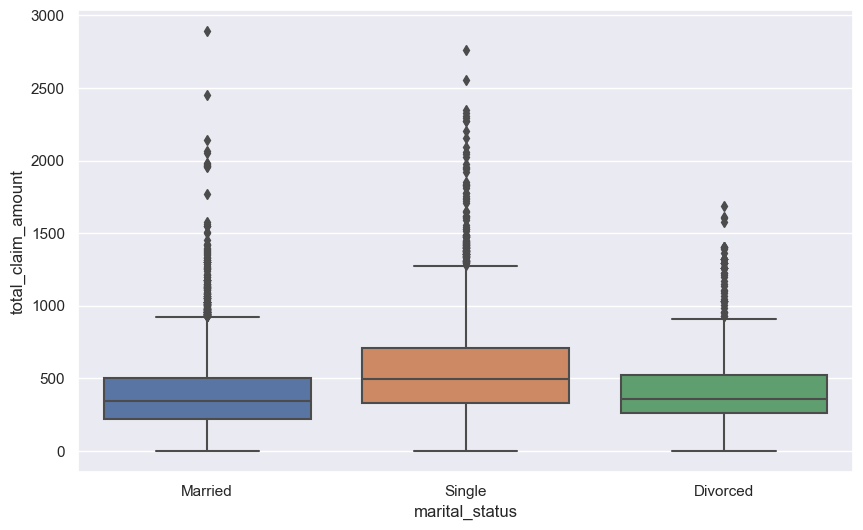

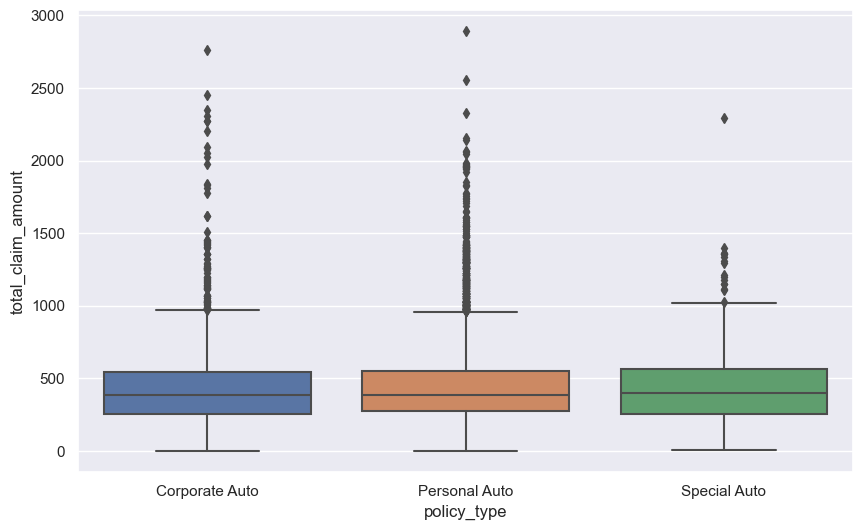

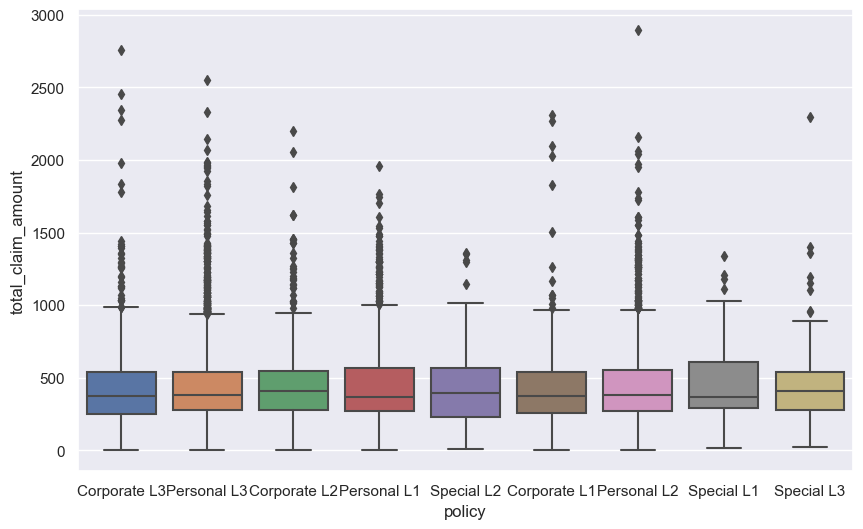

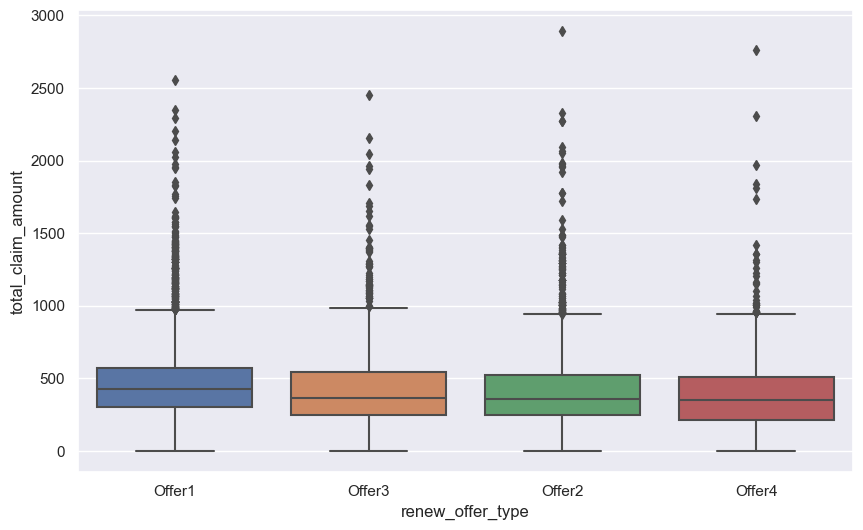

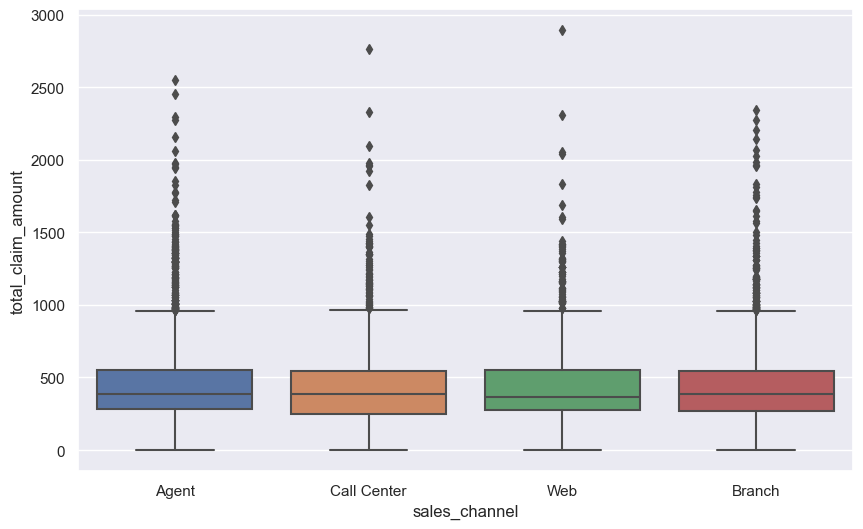

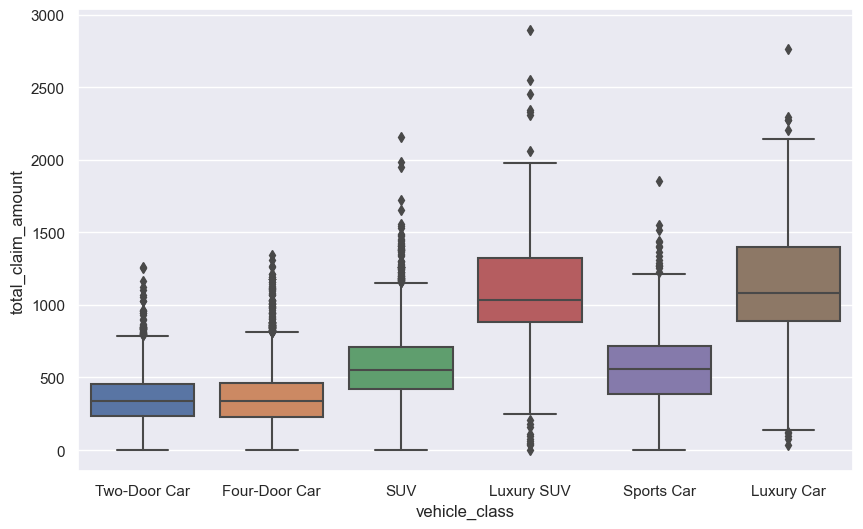

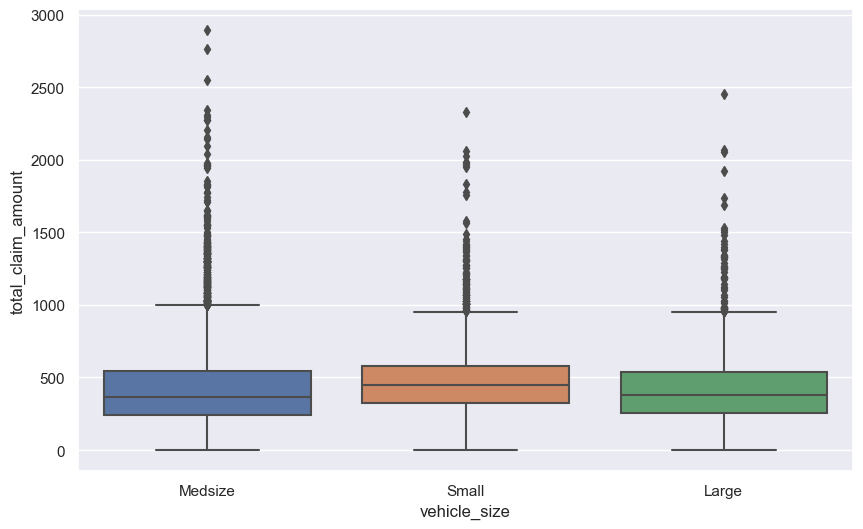

In [301]:
# Plot every categorical variable 
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical.columns:
    sns.boxplot( x = categorical[i], y="total_claim_amount", data=customer_df )
    plt.show()

In [302]:
# - For the categorical data, check if there is any data cleaning that need to perform. 
# Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
# Discuss if this information might in some way be used for data cleaning.

for i in categorical.columns:
    print('Name: {}'.format(categorical[i].name)) 
    print(categorical[i].value_counts())
    print('\n----------')

    # No tenemos valores nulos , ni typos, pero si muchos outliers (grafica de arriba)

Name: state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

----------
Name: response
No     7826
Yes    1308
Name: response, dtype: int64

----------
Name: coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

----------
Name: education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

----------
Name: effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/1

# <font color='orange'>Lab | Feature extraction  </font>

Instructions
- Open the categoricals variable we created before.
- categoricals = data.select_dtypes(np.object)
- categoricals.head()
- Plot all the categorical variables with the proper plot. What can you see?
- There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
- Plot time variable. Can you extract something from it?

In [303]:
categorical.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


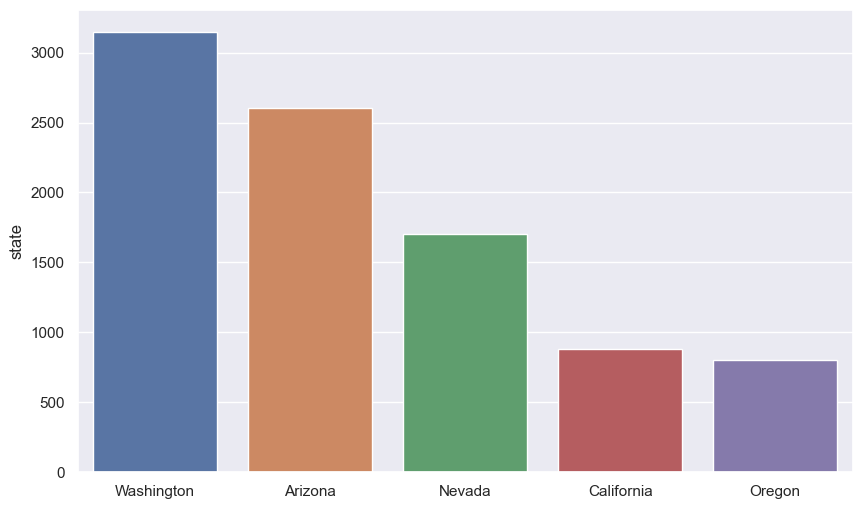

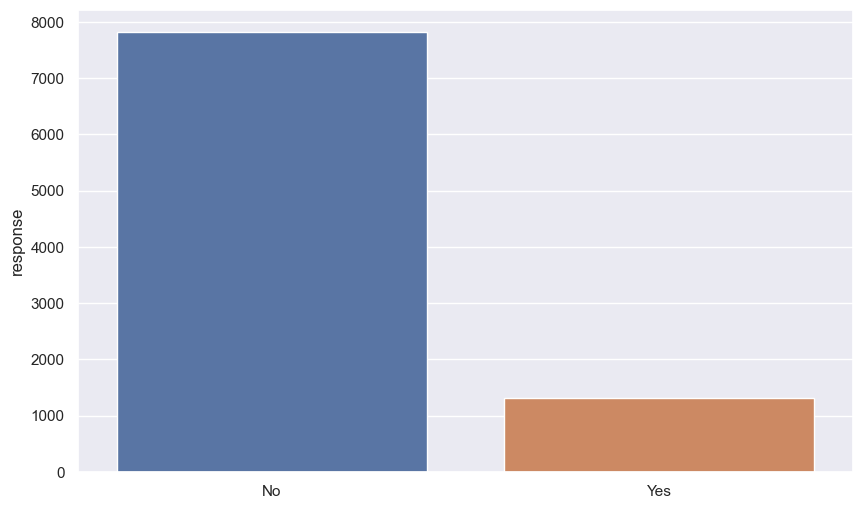

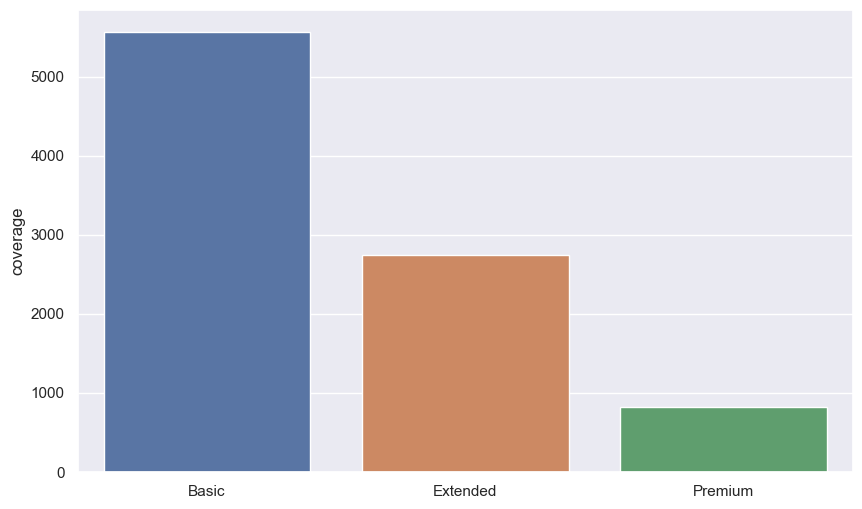

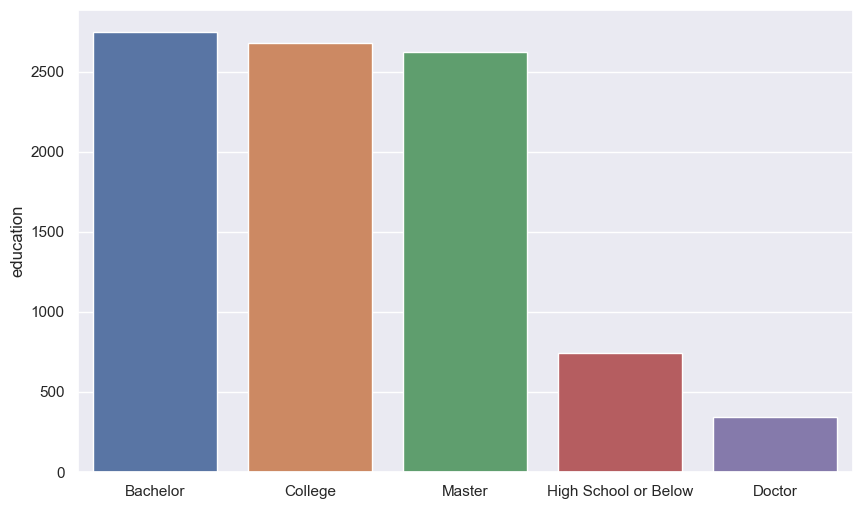

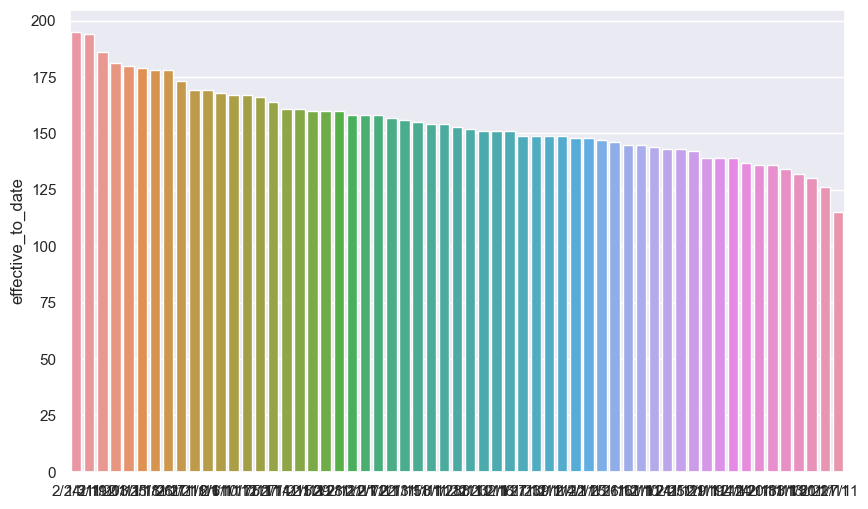

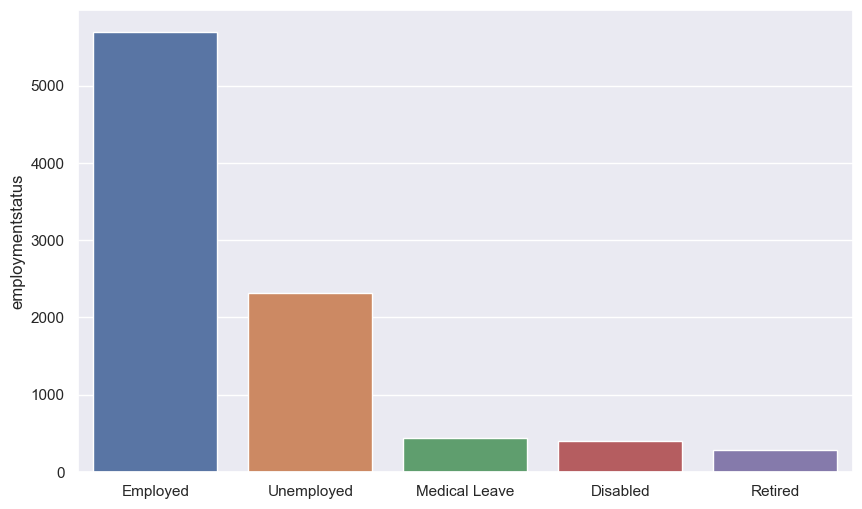

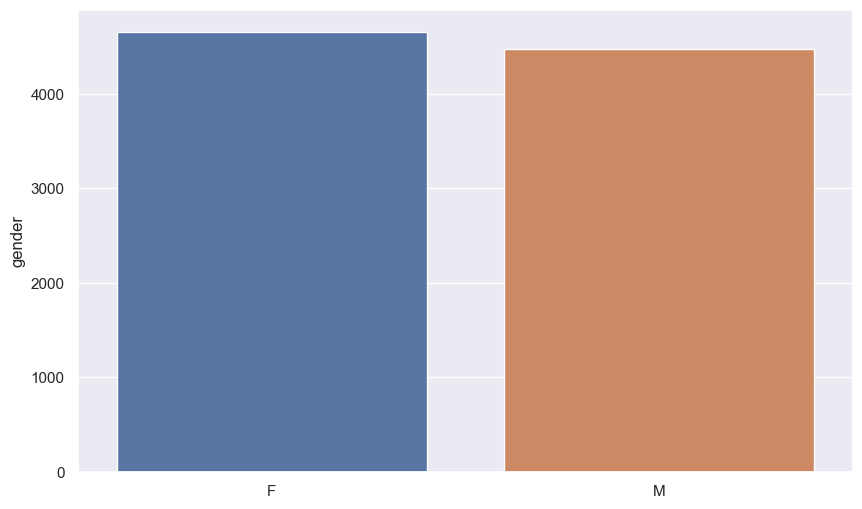

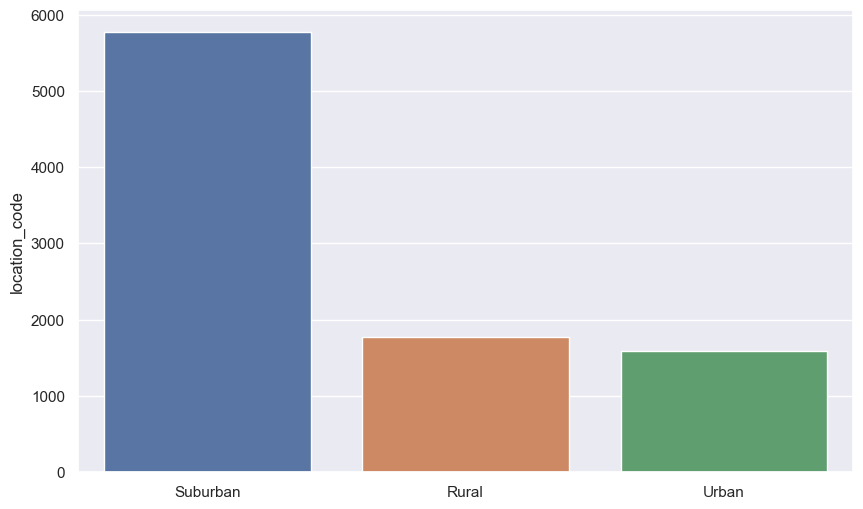

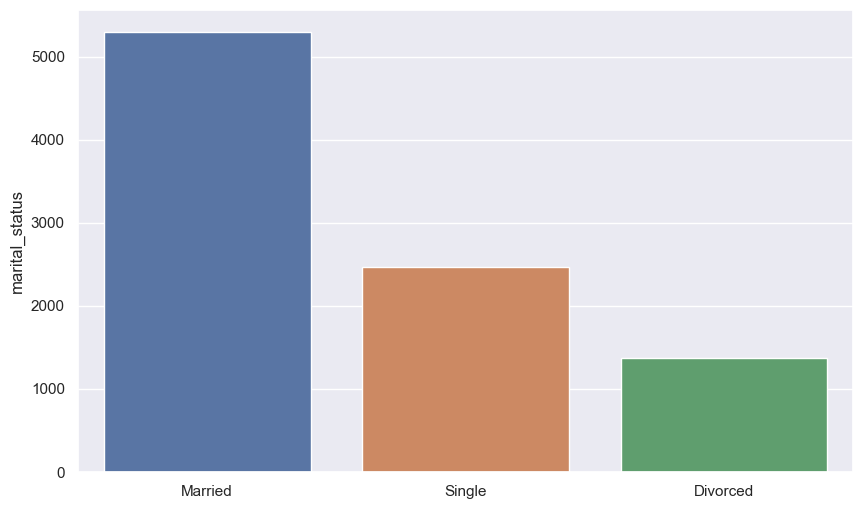

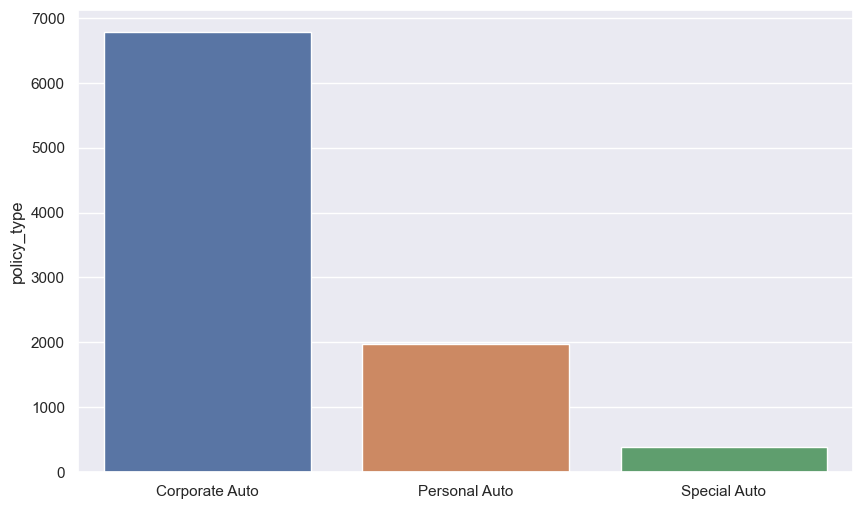

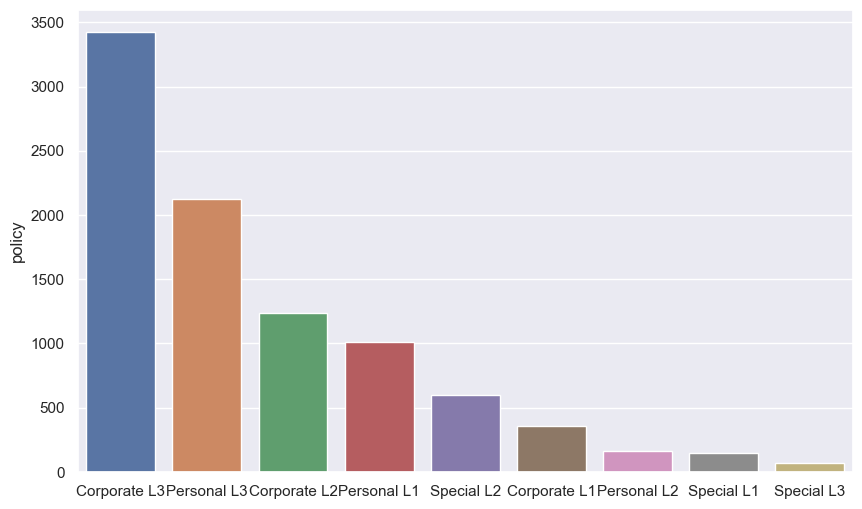

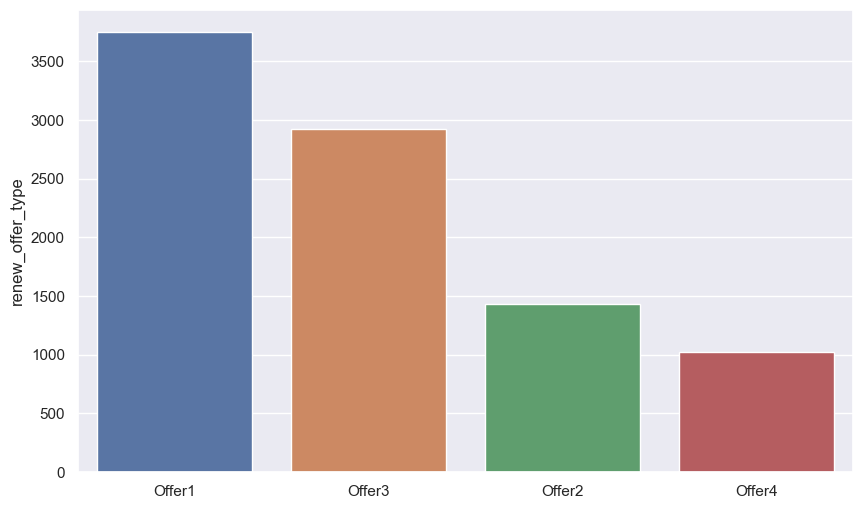

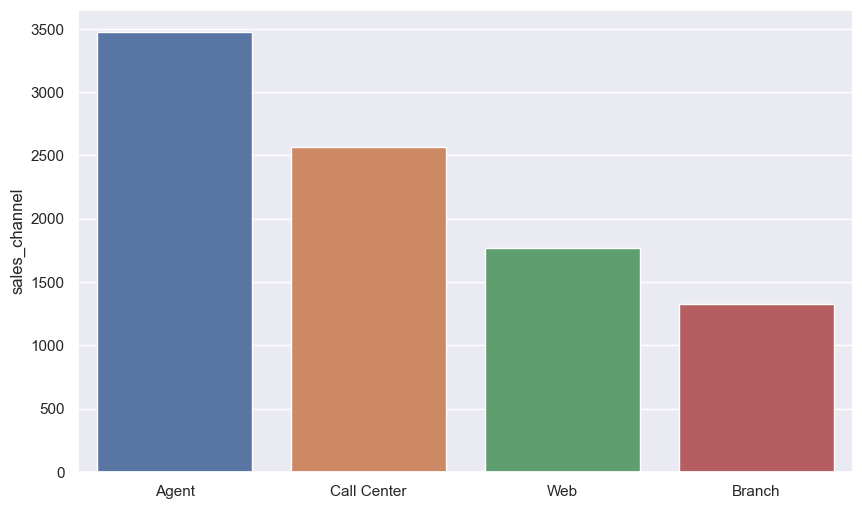

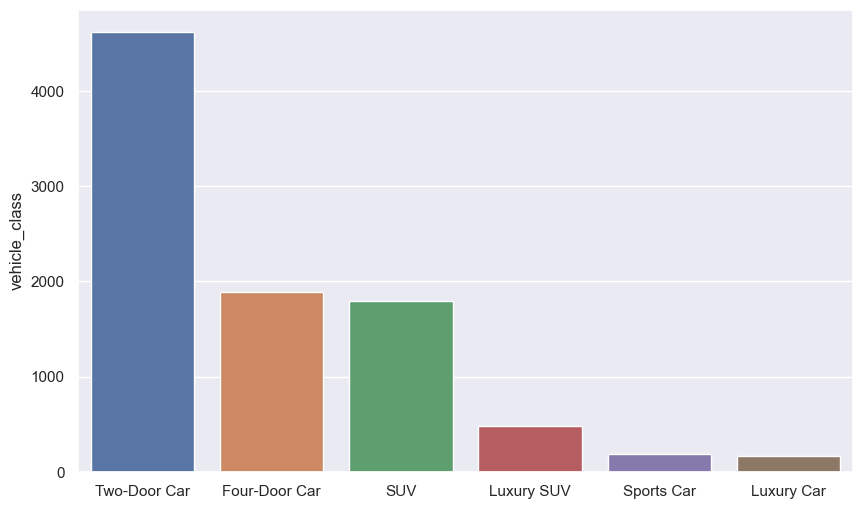

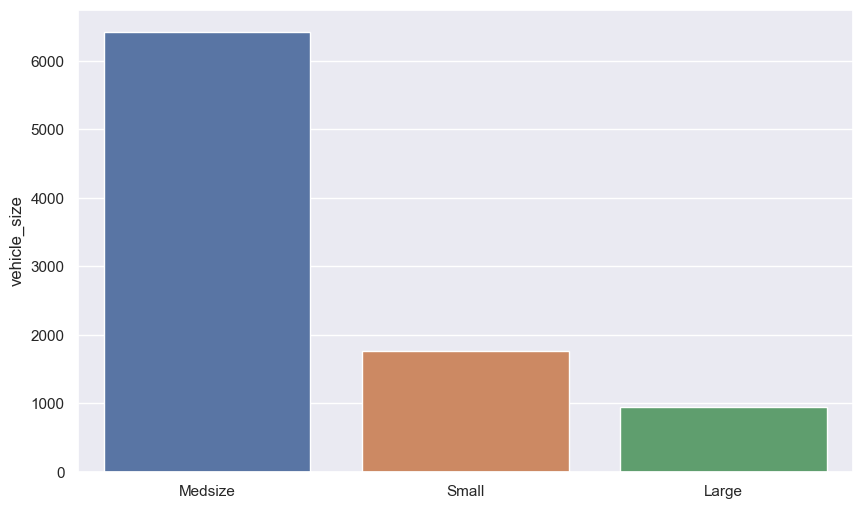

In [304]:

# Plot all the categorical variables with the proper plot. What can you see?
sns.set(rc={'figure.figsize':(10,6)})
for i in categorical.columns:
    sns.barplot(x=categorical[i].unique() , y=categorical[i].value_counts() , data=customer_df)
    plt.show()

In [305]:
# - There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
# policy tipe y policy contienen la misma informacion, solo que policy, la tiene mas detallada asi que no es necesario quedasrnos con las dos 

customer_df=customer_df.drop(['policy_type'],axis=1)
customer_df.head()


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,32,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,13,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,18,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,18,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,12,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [306]:
# Vamos a revisar los valores unicos de cada una de las variables categoricas para ver si podemos agrupar algunos caracteristicas
for i in categorical.columns:
    print('Name: {}'.format(categorical[i].name)) 
    print(categorical[i].value_counts())
    print('\n----------')

Name: state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

----------
Name: response
No     7826
Yes    1308
Name: response, dtype: int64

----------
Name: coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

----------
Name: education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

----------
Name: effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/1

In [307]:
# Podemos observar que  en la columna policy Special L2 tiene 164 valores , special L3 tiene 148 y Special L1 tiene 66, por lo que podriamos agruparlos en una sola categoria llamada Special
def cleanPolicy (x):
    if x in['Special L1','Special L2','Special L3']: return 'Special'
    else: return x
customer_df['policy']=list(map(cleanPolicy, customer_df['policy']))    

In [308]:
customer_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Special          378
Corporate L1     359
Name: policy, dtype: int64

<AxesSubplot:ylabel='policy'>

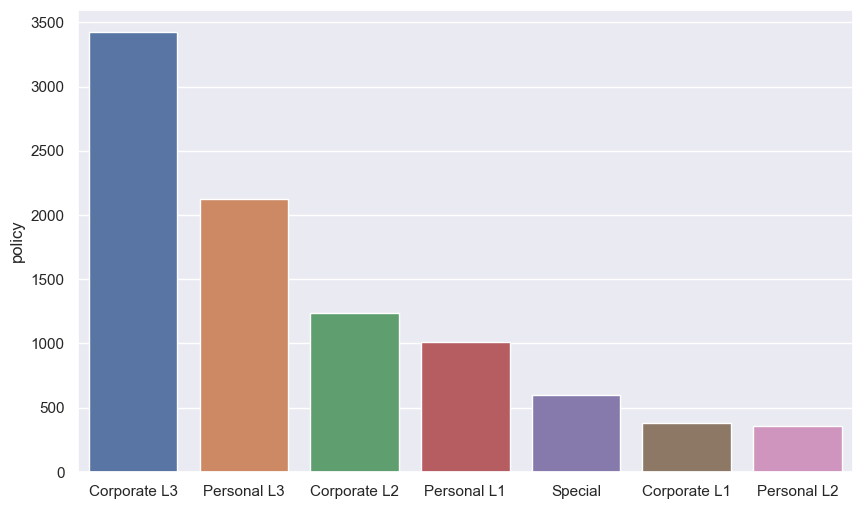

In [309]:
sns.barplot(x=customer_df['policy'].unique() , y=customer_df['policy'].value_counts() , data=customer_df)

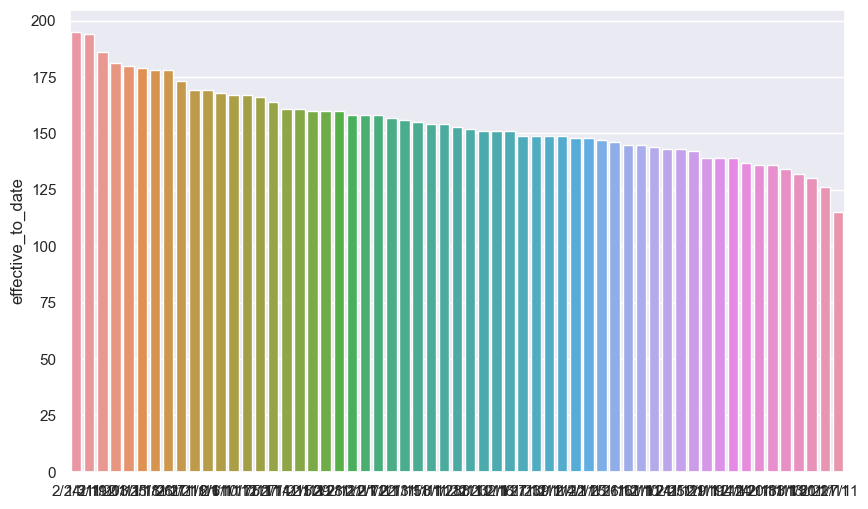

In [310]:
# Plot time variable. Can you extract something from it?
sns.barplot(x=customer_df['effective_to_date'].unique() , y=customer_df['effective_to_date'].value_counts() , data=customer_df)
plt.show()
# Debido a que tenemos la columna  con datos diarios, no podemos realmente obtener mucha informacion de ella, por lo que sacaremos una columna del mes y del  año

In [311]:
# Vamos a poner una columna Year que solo nos muestre los años
customer_df['year'] = pd.DatetimeIndex(customer_df['effective_to_date']).year
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011


In [312]:
# Vamos a poner una columna month que solo nos muestre los nombres de los meses
# customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month_name().str.slice(stop=3)
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month # si solo queria el numero
customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,0,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,0,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,0,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,0,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,0,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,0,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011,2
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,0,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011,2
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,3,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011,2
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,0,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011,2


In [313]:
customer_df.dtypes

state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
year                               int64
month                              int64
dtype: object

In [314]:
# Vamos a poner una columna 'week' que nos muestre las semanas
customer_df['week']=pd.DatetimeIndex(customer_df['effective_to_date']).week
customer_df


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,week
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,1,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,8
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,8,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,5
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,2,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,7
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,7,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,3
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,1,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,2,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011,2,6
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,1,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011,2,6
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,2,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011,2,5
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011,2,5


In [315]:
# Vamos a poner una columna 'dayweek' que nos muestre los dias de la semana
# customer_df['dayweek']=pd.DatetimeIndex(customer_df['effective_to_date']).strftime('%A') 
customer_df['dayweek']=pd.DatetimeIndex(customer_df['effective_to_date']).weekday


In [316]:
# Eliminamos la columna Effective_to_date
customer_df=customer_df.drop(['effective_to_date'], axis=1)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,week,dayweek
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,8,3
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,5,0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,7,5
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,3,3
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,5,3


In [317]:
customer_df['month'].value_counts()


1    4898
2    4236
Name: month, dtype: int64

<AxesSubplot:ylabel='month'>

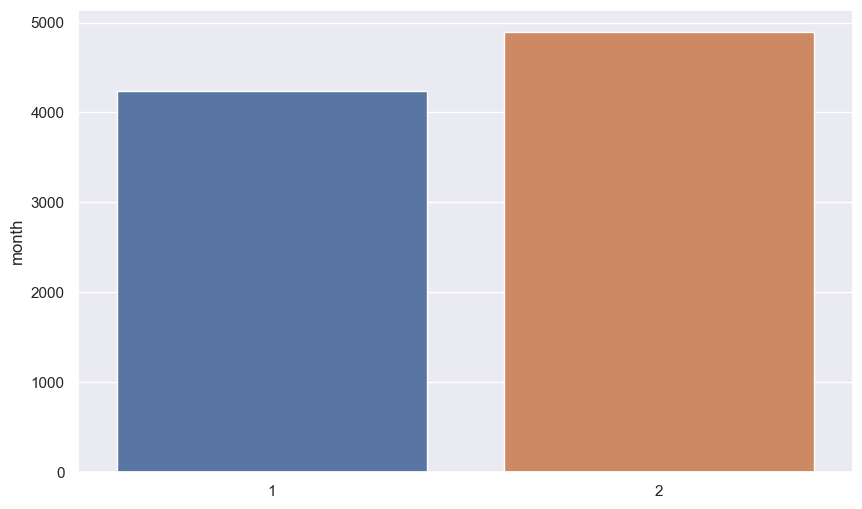

In [318]:
sns.barplot(x=customer_df['month'].unique() , y=customer_df['month'].value_counts() , data=customer_df)

In [319]:
customer_df['year'].value_counts()
# En este caso la data es del mismo año, bien podriamos eliminarlo

2011    9134
Name: year, dtype: int64

In [320]:
numerical = customer_df.select_dtypes("number")
categorical = customer_df.select_dtypes("object")

# <font color='orange'> Lab | Data cleaning and wrangling </font>

- Instructions
- So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.
- We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
- Create a copy of the dataframe for the data wrangling.
- Normalize the continuous variables. You can use any one method you want.
- Encode the categorical variables
- The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
- Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.
- Hint for Categorical Variables
- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

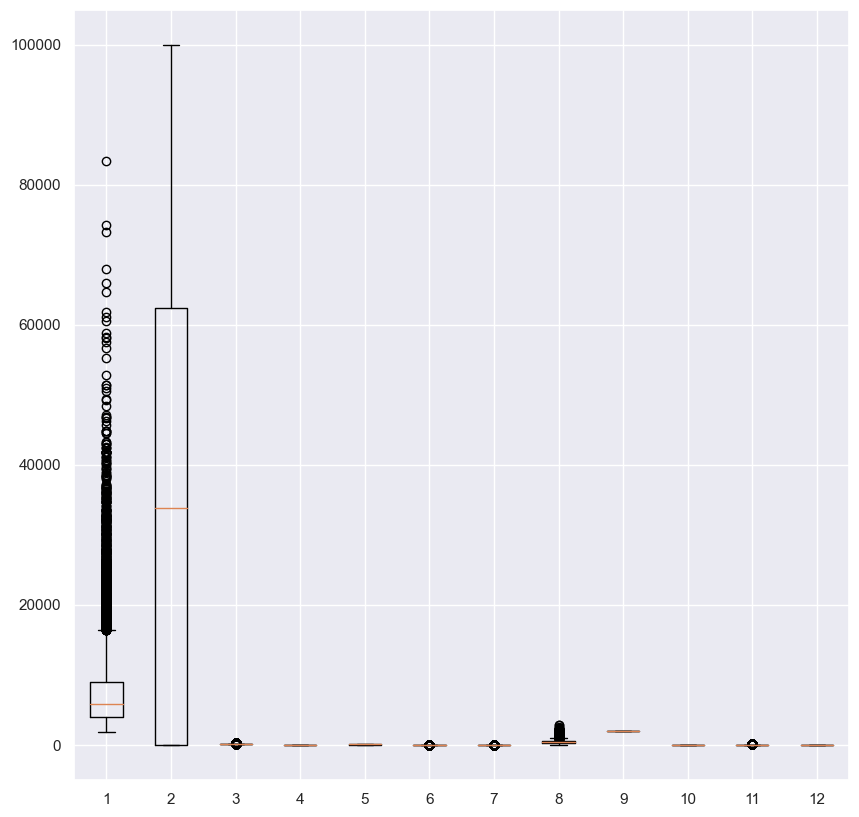

In [321]:
fig = plt.figure(figsize =(10, 10))
plt.boxplot(customer_df.select_dtypes(np.number))
plt.show()

In [322]:
customer_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,week,dayweek
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,8,3
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,5,0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,7,5
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,3,3
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011,2,6,3
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011,2,6,5
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011,2,5,6
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011,2,5,3


In [323]:
# We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, 
#define a function for that. Use the function to remove the outliers and apply it to the dataframe.
#Remove outliers

def re_outliers(x):
    for i in x.select_dtypes(np.number):
        q75, q25 = np.percentile(x[i].loc[:i],[75,25])
        intr_qr = q75-q25
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        x.loc[x[i]< min,i] = np.mean(x[i])
        x.loc[x[i]> max,i] = np.mean(x[i])
    return x

In [324]:
re_outliers(customer_df)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,week,dayweek
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274.0,Suburban,Married,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2.0,8.0,3.0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,Single,...,Personal L3,Offer3,Agent,434.088794,Four-Door Car,Medsize,2011,1.0,5.0,0.0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767.0,Suburban,Married,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2.0,7.0,5.0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,Married,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1.0,3.0,3.0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836.0,Rural,Single,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,8004.940475,No,Basic,Bachelor,Employed,M,71941.0,Urban,Married,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2011,2.0,6.0,3.0
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604.0,Suburban,Divorced,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2011,2.0,6.0,5.0
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0.0,Suburban,Single,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2011,2.0,5.0,6.0
9132,California,7524.442436,No,Extended,College,Employed,M,21941.0,Suburban,Married,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2011,2.0,5.0,3.0


In [325]:
# - Create a copy of the dataframe for the data wrangling.
data2=customer_df

In [326]:
numerical = data2.select_dtypes("number")
categorical = data2.select_dtypes("object")
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,year,month,week,dayweek
0,2763.519279,56274.0,69.0,32.0,5.0,0.0,1.0,384.811147,2011,2.0,8.0,3.0
1,6979.535903,0.0,94.0,13.0,42.0,0.0,8.0,434.088794,2011,1.0,5.0,0.0
2,12887.431650,48767.0,108.0,18.0,38.0,0.0,2.0,566.472247,2011,2.0,7.0,5.0
3,7645.861827,0.0,106.0,18.0,65.0,0.0,7.0,529.881344,2011,1.0,3.0,3.0
4,2813.692575,43836.0,73.0,12.0,44.0,0.0,1.0,138.130879,2011,2.0,5.0,3.0


In [327]:
x=numerical.drop(['total_claim_amount'], axis=1)
y=numerical['total_claim_amount']

In [328]:
x

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,year,month,week,dayweek
0,2763.519279,56274.0,69.0,32.0,5.0,0.000000,1.0,2011,2.0,8.0,3.0
1,6979.535903,0.0,94.0,13.0,42.0,0.000000,8.0,2011,1.0,5.0,0.0
2,12887.431650,48767.0,108.0,18.0,38.0,0.000000,2.0,2011,2.0,7.0,5.0
3,7645.861827,0.0,106.0,18.0,65.0,0.000000,7.0,2011,1.0,3.0,3.0
4,2813.692575,43836.0,73.0,12.0,44.0,0.000000,1.0,2011,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
9129,8004.940475,71941.0,73.0,18.0,89.0,0.000000,2.0,2011,2.0,6.0,3.0
9130,3096.511217,21604.0,79.0,14.0,28.0,0.000000,1.0,2011,2.0,6.0,5.0
9131,8163.890428,0.0,85.0,9.0,37.0,0.384388,2.0,2011,2.0,5.0,6.0
9132,7524.442436,21941.0,96.0,34.0,3.0,0.000000,3.0,2011,2.0,5.0,3.0


In [329]:
# - Normalize the continuous variables. You can use any one method you want.
# Aplicamos MinMaxScaler 
Minmax = MinMaxScaler()
Minmax = Minmax.fit_transform(x)
Minmax=pd.DataFrame(Minmax)
Minmax.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.059651,0.562847,0.073394,0.914286,0.050505,0.0,0.000000,0.0,1.0,0.875,0.500000
1,0.350217,0.000000,0.302752,0.371429,0.424242,0.0,1.000000,0.0,0.0,0.500,0.000000
2,0.757387,0.487763,0.431193,0.514286,0.383838,0.0,0.142857,0.0,1.0,0.750,0.833333
3,0.396140,0.000000,0.412844,0.514286,0.656566,0.0,0.857143,0.0,0.0,0.250,0.500000
4,0.063109,0.438443,0.110092,0.342857,0.444444,0.0,0.000000,0.0,1.0,0.500,0.500000


In [330]:
# Aplicamos Normalizer
transformer=Normalizer().fit(x)
Normalizer=transformer.transform(x)
Normalizer=pd.DataFrame(Normalizer) 
Normalizer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.049018,0.99816,0.001224,0.000568,0.000089,0.0,0.000018,0.035670,0.000035,0.000142,0.000053
1,0.960810,0.00000,0.012940,0.001790,0.005782,0.0,0.001101,0.276836,0.000138,0.000688,0.000000
2,0.255291,0.96604,0.002139,0.000357,0.000753,0.0,0.000040,0.039837,0.000040,0.000139,0.000099
3,0.966985,0.00000,0.013406,0.002276,0.008221,0.0,0.000885,0.254335,0.000126,0.000379,0.000379
4,0.063988,0.99690,0.001660,0.000273,0.001001,0.0,0.000023,0.045733,0.000045,0.000114,0.000068


In [331]:
# Aplicamos StandardScaler
Standard=StandardScaler()
Standard=Standard.fit_transform(x)
Standard=pd.DataFrame(Standard) 
Standard.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.172192,0.612827,-0.842906,1.678099,-1.543287,-0.509426,-0.847944,0.0,1.075304,1.466403,0.005657
1,0.174389,-1.239617,0.274621,-0.208186,-0.217334,-0.509426,2.661414,0.0,-0.929969,0.166867,-1.456708
2,2.061350,0.365710,0.900437,0.288205,-0.360680,-0.509426,-0.346607,0.0,1.075304,1.033224,0.980567
3,0.387211,-1.239617,0.811034,0.288205,0.606907,-0.509426,2.160077,0.0,-0.929969,-0.699489,0.005657
4,-1.156167,0.203390,-0.664102,-0.307465,-0.145661,-0.509426,-0.847944,0.0,1.075304,0.166867,0.005657


In [332]:
# Aplicamos QuantileTransformer
Quantile = QuantileTransformer(output_distribution='normal')
Quantile=Quantile.fit_transform(x)
Quantile=pd.DataFrame(Quantile)
Quantile.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.155230,0.508348,-0.621099,1.545927,-1.597698,-5.199338,-5.199338,-5.199338,5.199338,1.431971,-0.007527
1,0.207300,-5.199338,0.376283,-0.084155,-0.161281,-5.199338,5.199338,-5.199338,-5.199338,0.109365,-5.199338
2,1.620820,0.339282,0.791884,0.296607,-0.263985,-5.199338,-0.046436,-5.199338,5.199338,0.871679,0.764710
3,0.354562,-5.199338,0.720087,0.296607,0.486480,-5.199338,1.505747,-5.199338,-5.199338,-0.537980,-0.007527
4,-1.107094,0.236492,-0.278302,-0.161281,-0.103057,-5.199338,-5.199338,-5.199338,5.199338,0.109365,-0.007527


In [333]:
Minmax=Minmax.set_axis(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','year','month','week','dayweek'], axis=1)
Normalizer=Normalizer.set_axis(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','year','month','week','dayweek'], axis=1)
Standard=Standard.set_axis(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','year','month','week','dayweek'], axis=1)
Quantile=Quantile.set_axis(['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies','year','month','week','dayweek'], axis=1)
									

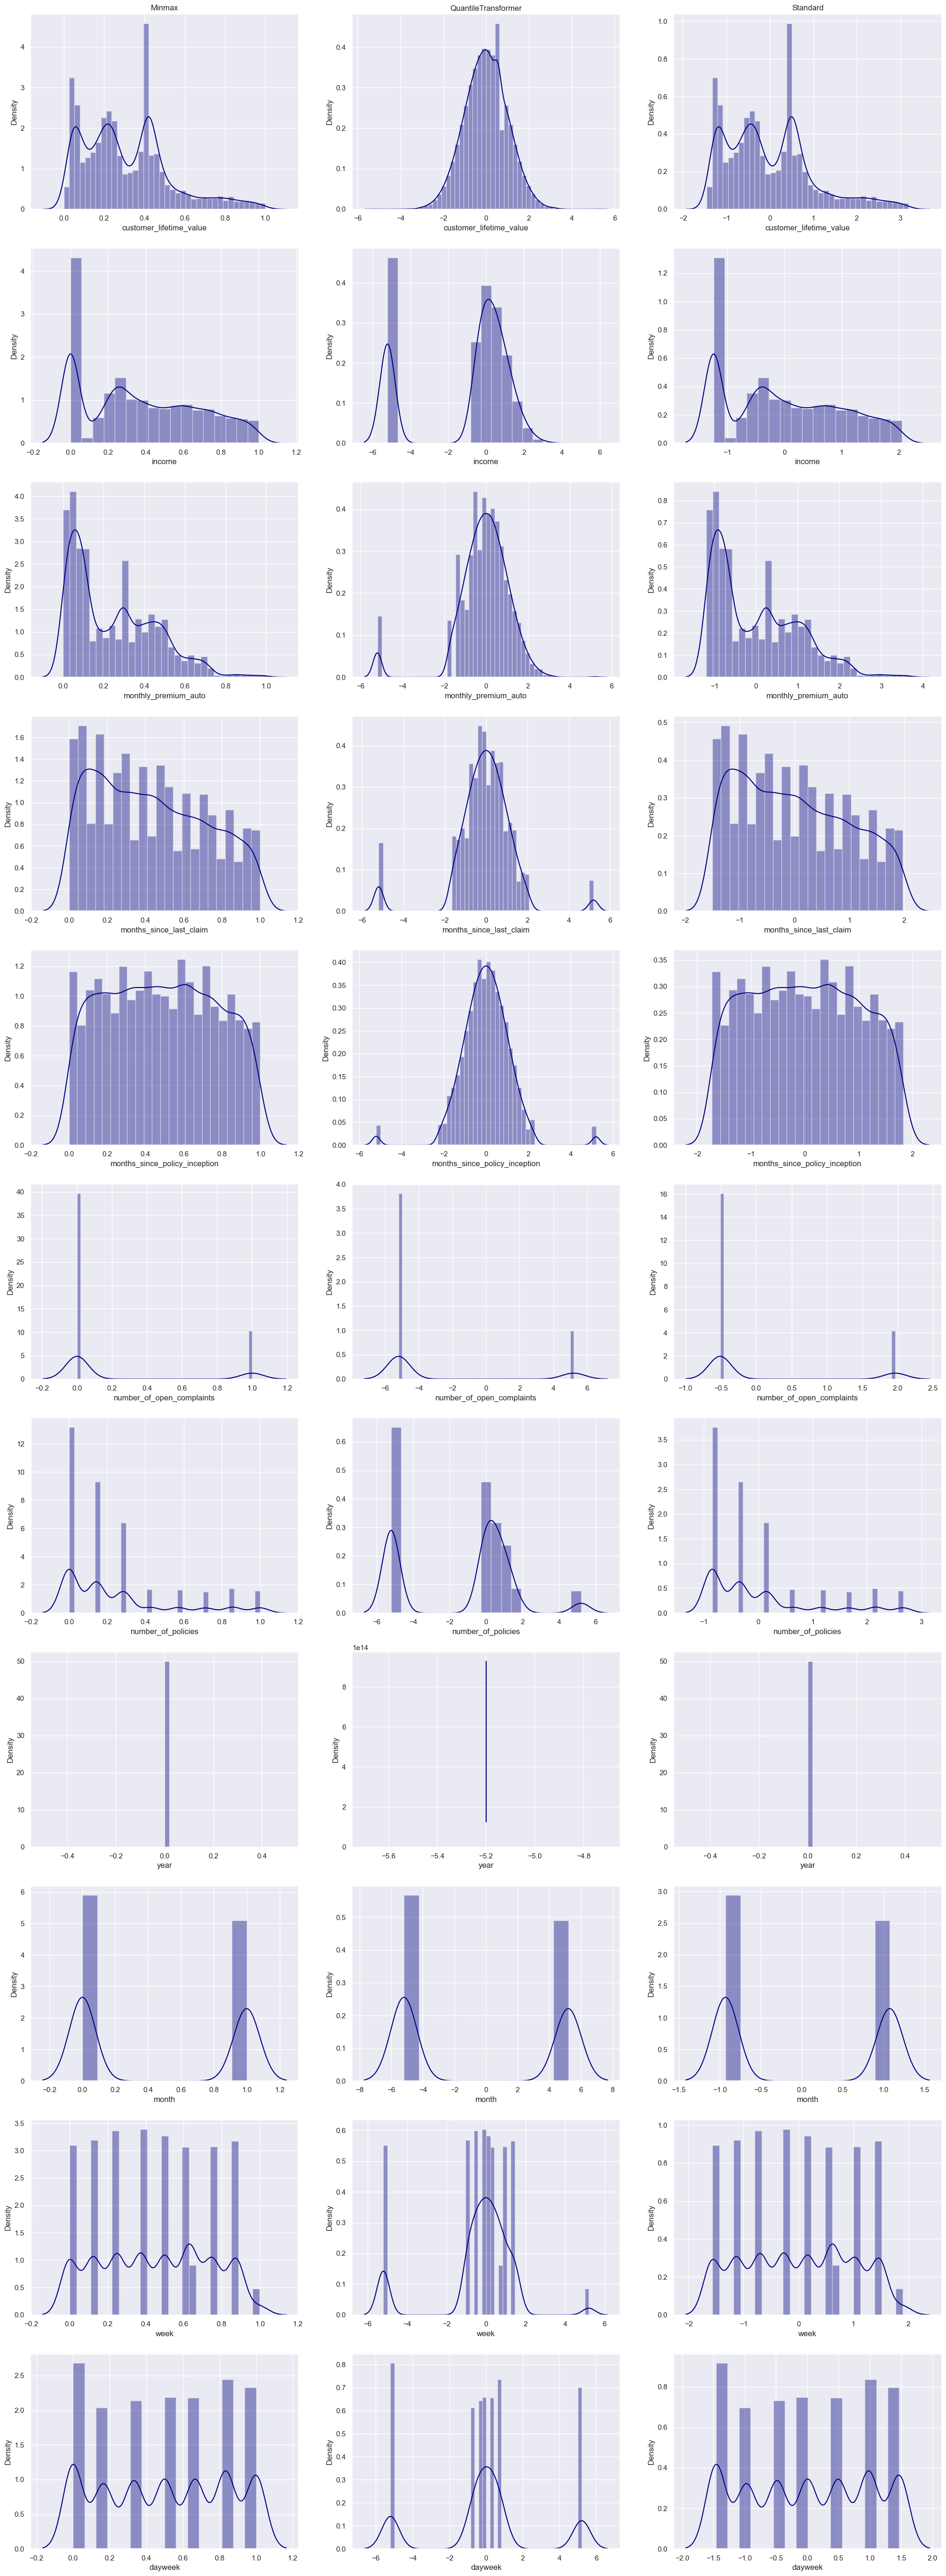

In [334]:
fig, ax = plt.subplots(nrows=len(x.columns), ncols=3, figsize=(25,70))
for i,col in enumerate(x.columns):
        sns.distplot(Minmax.iloc[:,i], ax = ax[i][0], color='navy')
        sns.distplot(Quantile.iloc[:,i], ax = ax[i][1], color='navy')
        sns.distplot(Standard.iloc[:,i], ax = ax[i][2], color='navy')
        ax[0][0].set_title ('Minmax')
        ax[0][1].set_title ('QuantileTransformer')
        ax[0][2].set_title ('Standard')

# Vamos a quedarnos con la QuantileTransformer para probar

- Encode the categorical variables
- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

In [335]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [336]:
#OneHot state, marital_status, policy, renew_offer_type, sales_channel, vehicle_class
categorical_one=categorical.drop(['coverage','employmentstatus','location_code','vehicle_size'],axis=1)
categorical_one

,state,response,education,gender,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,No,Bachelor,F,Married,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,No,Bachelor,F,Single,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,No,Bachelor,F,Married,Personal L3,Offer1,Agent,Two-Door Car
3,California,No,Bachelor,M,Married,Corporate L2,Offer1,Call Center,SUV
4,Washington,No,Bachelor,M,Single,Personal L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...
9129,California,No,Bachelor,M,Married,Personal L1,Offer2,Web,Four-Door Car
9130,California,Yes,College,F,Divorced,Corporate L3,Offer1,Branch,Four-Door Car
9131,California,No,Bachelor,M,Single,Corporate L2,Offer1,Branch,Four-Door Car
9132,California,No,College,M,Married,Personal L2,Offer3,Branch,Four-Door Car


In [337]:
# Ordinal
categorical_ord=categorical.drop(['state','response','education','gender','marital_status','policy','renew_offer_type','sales_channel','vehicle_class'],axis=1)
categorical_ord

,coverage,employmentstatus,location_code,vehicle_size
0,Basic,Employed,Suburban,Medsize
1,Extended,Unemployed,Suburban,Medsize
2,Premium,Employed,Suburban,Medsize
3,Basic,Unemployed,Suburban,Medsize
4,Basic,Employed,Rural,Medsize
...,...,...,...,...
9129,Basic,Employed,Urban,Medsize
9130,Extended,Employed,Suburban,Medsize
9131,Extended,Unemployed,Suburban,Medsize
9132,Extended,Employed,Suburban,Large


In [338]:
encoder=OneHotEncoder(drop='first').fit(categorical_one)
encoder=encoder.transform(categorical_one).toarray()
encoder=pd.DataFrame(encoder)
encoder

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [339]:
encoder2=OrdinalEncoder()
encoder2=encoder2.fit_transform(categorical_ord)
encoder2=pd.DataFrame(encoder2)
encoder2

,0,1,2,3
0,0.0,1.0,1.0,1.0
1,1.0,4.0,1.0,1.0
2,2.0,1.0,1.0,1.0
3,0.0,4.0,1.0,1.0
4,0.0,1.0,0.0,1.0
...,...,...,...,...
9129,0.0,1.0,2.0,1.0
9130,1.0,1.0,1.0,1.0
9131,1.0,4.0,1.0,1.0
9132,1.0,1.0,1.0,0.0


In [340]:
categorical_encode=np.concatenate((encoder,encoder2),axis=1)
categorical_encode=pd.DataFrame(categorical_encode)
categorical_encode

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
9131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


# <font color='orange'> Lab | Comparing regression models </font>

- Instructions
- In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
- Try a simple linear regression with all the data to see whether we are getting good results.
- Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
- Use the function to check LinearRegressor and KNeighborsRegressor.
- You can check also the MLPRegressor for this task!
- Check and discuss the results.

In [341]:
# Vamos a unir nuestra data procesada, nos quedaremos con el QuantileTransformer
X=np.concatenate((Quantile,categorical_encode), axis=1)
X=pd.DataFrame(X)
X


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-1.155230,0.508348,-0.621099,1.545927,-1.597698,-5.199338,-5.199338,-5.199338,5.199338,1.431971,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1,0.207300,-5.199338,0.376283,-0.084155,-0.161281,-5.199338,5.199338,-5.199338,-5.199338,0.109365,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0
2,1.620820,0.339282,0.791884,0.296607,-0.263985,-5.199338,-0.046436,-5.199338,5.199338,0.871679,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
3,0.354562,-5.199338,0.720087,0.296607,0.486480,-5.199338,1.505747,-5.199338,-5.199338,-0.537980,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
4,-1.107094,0.236492,-0.278302,-0.161281,-0.103057,-5.199338,-5.199338,-5.199338,5.199338,0.109365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.558392,0.938824,-0.278302,0.296607,1.374878,-5.199338,-0.046436,-5.199338,5.199338,0.414267,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
9130,-0.946970,-0.427976,-0.086674,-0.008782,-0.561327,-5.199338,-5.199338,-5.199338,5.199338,0.414267,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
9131,0.746446,-5.199338,0.050204,-0.408805,-0.293986,5.199338,-0.046436,-5.199338,5.199338,0.109365,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0
9132,0.324223,-0.414869,0.427976,1.968165,-1.817968,-5.199338,0.573115,-5.199338,5.199338,0.109365,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [342]:
# In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=50)

In [343]:
# Try a simple linear regression with all the data to see whether we are getting good results.
lm=linear_model.LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [344]:
# Probamos para mis datos de prueba
pred_ln=lm.predict(X_test)
print('Testing R2 Score:', r2_score(y_test,pred_ln))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,pred_ln)))
print('Testing MAE:', mean_absolute_error(y_test, pred_ln))
print('Testing MSE:', mean_squared_error(y_test, pred_ln))

Testing R2 Score: 0.46443679025953644
Testing RMSE: 152.48320371751413
Testing MAE: 120.63809535953297
Testing MSE: 23251.12741595692


In [345]:
# Probamos para mis datos de entrenamiento
pred_ln_trn=lm.predict(X_train)
print('Testing R2 Score:', r2_score(y_train,pred_ln_trn))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_train,pred_ln_trn)))
print('Testing MAE:', mean_absolute_error(y_train, pred_ln_trn))
print('Testing MSE:', mean_squared_error(y_train, pred_ln_trn))

Testing R2 Score: 0.4517725602689764
Testing RMSE: 152.13467137785423
Testing MAE: 120.73860239506307
Testing MSE: 23144.9582352477


In [346]:
# Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
# No me dio la cabeza para crear la funcion pero encontre algo muy interesante XD...

In [347]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


Modelos = [KNeighborsRegressor(),LinearRegression()]

def train(c) :
            model = c.fit(X_train, y_train)
            pred = model.predict(X_test)
            print(model)
            print('Testing R2 Score:', r2_score(y_test,pred))
            print('Testing RMSE:', np.sqrt(mean_squared_error(y_test,pred)))
            print('Testing MAE:', mean_absolute_error(y_test, pred))
            print('Testing MSE:', mean_squared_error(y_test, pred))
            print('=======')
            print('')
            return 

In [348]:
for x in Modelos:
    Res=train(x)

KNeighborsRegressor()
Testing R2 Score: 0.38796816094935993
Testing RMSE: 160.8371509032788
Testing MAE: 117.43150768847119
Testing MSE: 25868.589110684075

LinearRegression()
Testing R2 Score: 0.4689107667987742
Testing RMSE: 149.82459488679623
Testing MAE: 119.43396374707632
Testing MSE: 22447.409232992606



In [349]:
# Tratemos de que se vea mas elegante
Modelos = [KNeighborsRegressor(),LinearRegression(),MLPRegressor()]

def train(c) :
    model = c.fit(X_train, y_train)
    pred = model.predict(X_test)
    R2score = ('R2score: ' f"{r2_score(y_test,pred):.4f}")
    RMSE = ('RMSE: ' f"{np.sqrt(mean_squared_error(y_test,pred)):.4f}")
    MAE = ('MAE: ' f"{mean_absolute_error(y_test, pred):.4f}")
    MSE = ('MSE: ' f"{mean_squared_error(y_test, pred):.4f}")
    return  model , R2score, RMSE, MAE, MSE

# Se intento XD



In [350]:
for x in Modelos:
    Res=train(x)
    print(train(x))

(KNeighborsRegressor(), 'R2score: 0.3880', 'RMSE: 160.8372', 'MAE: 117.4315', 'MSE: 25868.5891')
(LinearRegression(), 'R2score: 0.4689', 'RMSE: 149.8246', 'MAE: 119.4340', 'MSE: 22447.4092')
(MLPRegressor(), 'R2score: 0.7378', 'RMSE: 105.2738', 'MAE: 76.9923', 'MSE: 11082.5817')


In [351]:
#  MLPRegressor : Este modelo optimiza el error cuadrático utilizando LBFGS o descenso de gradiente estocástico.
# El modelo que mejor se comporta con nuestros datos de prueba es el MLP regrresor ya que tiene la mayor r2 y sus errores son menores